<a href="https://colab.research.google.com/github/doaa450/-Real-Estate-Market-Analysis/blob/main/Real_Estate_Market_Analysis_with_Python_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Case Description**
Background: The real estate market is a complex and dynamic entity of great interest for professionals in the field, investors, policymakers, and data analysts that wish to thoroughly understand the market conditions and customer behavior and make informed decisions. In our Real Estate Market Analysis with Python project, the client—a leading company in the industry—has collected data on properties and their customers and wishes you to help them with the real estate analysis.

Project Objective: This Real Estate Market Analysis with Python project aims for you to preprocess, analyze, and visualize the real estate property data, thereby generating meaningful insights about property transactions and customer profiles.

 ### **Project requirements**

For this Real Estate Market Analysis with Python project, you’ll need Python v.3 and Jupyter Notebook installed.

You’ll need to have the following Python libraries installed:

    pandas
    NumPy
    Matplotlib
    datetime
    seaborn (optional)




The data in this Real Estate Market Analysis with Python project is divided into two main tables. The first dataset contains details about the properties, including ID, building details, sale date, etc. The second dataset comprises customer details, such as customer ID, entity, name, surname, and more.


### **Project content**

    2 Project files
    Part 1: Data Preprocessing
    Part 2: Descriptive Statistics
    Part 3: Data Analysis
    Part 4: Data Visualization
    Part 5: Data Interpretation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


### **Data Preprocessing**

The initial stage involves cleaning and preparing the data for real estate analysis, including handling missing values, correcting inconsistencies, and transforming data types if necessary. You must clean and preprocess the customers and property tables, ensure column names are in order and that missing values appear correctly, and apply any column data type changes you see fit.
Finally, you should combine the properties  and customers tables into one unified real estate dataset using the shared customer_id column. You must consolidate inconsistencies or missing values to perform the following analysis and obtain the correct results.

**Properties and Customers**

You must review the list, preprocess, and clean both datasets accordingly.

        Descriptive statistics: You can start the analysis with descriptive statistics of the data and check for missing values.
        Datatypes: Evaluate the datatypes of the columns and decide whether some of the datatypes need to be changed.
        Column names: Check if there is an issue with any column names and rename them if necessary.
        Categorical to numerical: Change categorical values to numeric when possible and needed. Use the 0 1 convention when mapping.
        Case: If there are inconsistencies with Capitol and lowercases, unify them using the lowercase convention.
        Missing values: Ensure missing values are correctly indicated.
        Date variables: Make sure you handle and transform the date variables as a date.

**Combining the Two Datasets**

This phase aims to merge our two cleaned datasets (properties  and customers) into a comprehensive dataset.

    1- Preliminary Checks. Visually inspect the two datasets and decide which variable to merge. As both datasets share only column – you must opt for the customer_id  column.

    2-Initial Merge Attempt. You can leverage the pandas' functionality to combine the two tables without initial preprocessing. Think about what kind of join would make sense in the context of the given problem.

    3-Resolving Merge Issues. If the initial attempt to merge the data does not yield the correct data frame, you must examine and preprocess the data further. Think about which variable is likely causing the merge issue and review it closely- it makes sence to check the customer_id column. You must examine the values of the ids for both properties  and customers datasets. You will notice that there are unneccessary spaces in one of the datasets which you must remove. After that you should be able to merge successfully.

Sanity check: You should obtain a pandas data frame of 267 rows and 19 columns.


In [2]:
customers_df=pd.read_csv("/content/customers.csv")
Properties_df=pd.read_csv("/content/properties.csv")

*customers_df*

In [3]:
customers_df.head()

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [4]:
customers_df.columns

Index(['Unnamed: 0', '﻿customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')

In [5]:
customers_df.shape

(162, 13)

In [6]:
customers_df['entity'].value_counts()

Individual    155
Company         7
Name: entity, dtype: int64

In [7]:
customers_df['sex'].value_counts()

M    87
F    68
Name: sex, dtype: int64

In [8]:
customers_df['country'].unique()

array(['USA', 'USA ', 'Canada', 'Germany', 'Belgium', 'Mexico', 'Russia',
       'UK', 'Denmark'], dtype=object)

In [9]:
customers_df['country'].replace({'USA ': 'USA'}, inplace=True)

In [10]:
customers_df['country'].value_counts()

USA        150
Russia       4
Belgium      2
UK           2
Canada       1
Germany      1
Mexico       1
Denmark      1
Name: country, dtype: int64

In [11]:
customers_df['state'].value_counts()

California    100
Nevada         14
Colorado       11
Arizona        10
Oregon          9
Utah            5
Virginia        3
Wyoming         1
Kansas          1
Name: state, dtype: int64

In [12]:
customers_df['purpose'].value_counts()

Home          112
Investment     50
Name: purpose, dtype: int64

In [13]:
customers_df['deal_satisfaction'].value_counts()

5    47
4    38
3    37
2    22
1    18
Name: deal_satisfaction, dtype: int64

In [14]:
customers_df['mortgage'].value_counts()

No     102
Yes     60
Name: mortgage, dtype: int64

In [15]:
customers_df['source'].value_counts()

Website    93
Agency     54
Client     15
Name: source, dtype: int64

In [16]:
customers_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [17]:
customers_df.shape

(162, 12)

In [18]:
customers_df.dtypes

﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [19]:
# Correcting Data Types
customers_df['birth_date'] = pd.to_datetime(customers_df['birth_date'], errors='coerce')

In [20]:
# Remove duplicate rows
customers_df.drop_duplicates(inplace=True)

In [21]:
# Handling missing values
customers_df.isnull().sum()

﻿customerid          0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
customers_df['sex'] = imputer.fit_transform(customers_df[['sex']])

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
customers_df['state'] = imputer.fit_transform(customers_df[['state']])

In [24]:
most_frequent_birth_date = customers_df['birth_date'].mode().iloc[0]
customers_df['birth_date'].fillna(most_frequent_birth_date, inplace=True)

In [25]:
most_frequent_birth_date

Timestamp('1948-04-23 00:00:00')

In [26]:
customers_df.isnull().sum()

﻿customerid          0
entity               0
name                 0
surname              0
birth_date           0
sex                  0
country              0
state                0
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [27]:
Properties_df.head()

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [28]:
Properties_df.columns

Index(['Unnamed: 0', '﻿id', 'building', 'date_sale', 'type', 'property#',
       'area', 'price', 'status', 'customerid'],
      dtype='object')

In [29]:
Properties_df.drop(['Unnamed: 0', '﻿id'], axis=1, inplace=True)

In [30]:
Properties_df['building'].value_counts()

3    63
2    57
1    52
5    52
4    43
Name: building, dtype: int64

In [31]:
Properties_df['type'].value_counts()

Apartment    259
Office         8
Name: type, dtype: int64

In [32]:
Properties_df['status'].value_counts()

 Sold     195
-          72
Name: status, dtype: int64

In [33]:
Properties_df.dtypes

building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [34]:
Properties_df['date_sale'] = pd.to_datetime(Properties_df['date_sale'], errors='coerce')

In [35]:
# Remove dollar signs from the 'price' column and Convert the 'price' column to numeric
Properties_df['price'] = pd.to_numeric(Properties_df['price'].str.replace('[\$,]', '', regex=True).str.strip())


In [36]:
Properties_df.isnull().sum()

building       0
date_sale     72
type           0
property#      0
area           0
price          0
status         0
customerid    72
dtype: int64

In [37]:
Properties_df.head()

,building,date_sale,type,property#,area,price,status,customerid
0,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,C0028
1,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,C0027
2,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,C0112
3,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,C0160
4,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,C0014


In [38]:
Properties_df[Properties_df.isnull().any(axis=1)]

,building,date_sale,type,property#,area,price,status,customerid
178,5,NaT,Apartment,52,1769.48,532877.38,-,NaN
196,1,NaT,Apartment,2,1238.58,400865.92,-,NaN
197,1,NaT,Office,3,713.71,217787.71,-,NaN
198,1,NaT,Apartment,8,763.21,219630.90,-,NaN
199,1,NaT,Apartment,19,798.50,244624.87,-,NaN
...,...,...,...,...,...,...,...,...
262,5,NaT,Apartment,44,1238.58,322610.74,-,NaN
263,5,NaT,Apartment,47,794.52,279191.26,-,NaN
264,5,NaT,Apartment,48,1013.27,287996.53,-,NaN
265,5,NaT,Apartment,50,1074.71,365868.78,-,NaN


In [39]:
Properties_df['status'].replace({'-': 'unsold'}, inplace=True)

In [40]:
replacement_values = {'NaT': 99, 'NaN': 0}
Properties_df.fillna(value=replacement_values, inplace=True)

In [41]:
Properties_df.shape

(267, 8)

In [42]:
Properties_df.columns

Index(['building', 'date_sale', 'type', 'property#', 'area', 'price', 'status',
       'customerid'],
      dtype='object')

In [43]:
customers_df.columns

Index(['﻿customerid', 'entity', 'name', 'surname', 'birth_date', 'sex',
       'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')

In [44]:
customers_df.rename(columns={'﻿customerid': 'Customer_ID'}, inplace=True)

In [45]:
Properties_df.rename(columns={'customerid': 'Customer_ID'}, inplace=True)

In [46]:
customers_df['Customer_ID'] = customers_df['Customer_ID'].str.strip()
Properties_df['Customer_ID'] = Properties_df['Customer_ID'].str.strip()


In [47]:
customers_df['Customer_ID'] = customers_df['Customer_ID'].str.lower()
Properties_df['Customer_ID'] = Properties_df['Customer_ID'].str.lower()


In [48]:
merged_df = pd.merge(Properties_df, customers_df, on='Customer_ID', how='outer')

In [49]:
merged_df.shape

(267, 19)

In [50]:
merged_df.head()

,building,date_sale,type,property#,area,price,status,Customer_ID,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,c0028,Individual,Madalyn,Mercer,1986-06-21,F,USA,California,Home,5.0,No,Website
1,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,c0027,Individual,Lara,Carrillo,1983-02-24,F,USA,California,Home,5.0,No,Website
2,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,c0112,Individual,Donavan,Flowers,1985-12-27,M,USA,California,Home,1.0,Yes,Client
3,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,c0160,Individual,Darien,Dorsey,1985-12-27,M,USA,California,Investment,3.0,Yes,Website
4,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,c0014,Individual,Alessandra,Perry,1979-05-15,F,USA,California,Home,4.0,No,Agency


In [51]:
merged_df.isnull().sum()

building              0
date_sale            72
type                  0
property#             0
area                  0
price                 0
status                0
Customer_ID          72
entity               72
name                 72
surname              72
birth_date           72
sex                  72
country              72
state                72
purpose              72
deal_satisfaction    72
mortgage             72
source               72
dtype: int64

In [52]:
merged_df[merged_df.isnull().any(axis=1)]

,building,date_sale,type,property#,area,price,status,Customer_ID,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
178,5,NaT,Apartment,52,1769.48,532877.38,unsold,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,1,NaT,Apartment,2,1238.58,400865.92,unsold,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,1,NaT,Office,3,713.71,217787.71,unsold,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,1,NaT,Apartment,8,763.21,219630.90,unsold,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,1,NaT,Apartment,19,798.50,244624.87,unsold,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,5,NaT,Apartment,44,1238.58,322610.74,unsold,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,5,NaT,Apartment,47,794.52,279191.26,unsold,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,5,NaT,Apartment,48,1013.27,287996.53,unsold,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,5,NaT,Apartment,50,1074.71,365868.78,unsold,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 ### **Descriptive Statistics**

Now that we have successfully merged the two datasets, we can turn our attention to the next part of the analysis: descriptive statistics.
A comprehensive statistical analysis will be conducted to understand the distribution of the key variables.

    What are each variable's main characteristics—specifically the numerical ones?
    What are the sales and overall performance by building type?
    What are the sales and overall performance by country and state?

**Breakdown by Building**

First, we focus on the buildings’ variable and their different types. Here you must examine the totals and averages breakdown by building.

    Start by examining how many building types there are in the data set.
    Select columns of interest which to examine the totals by building type. Make a list with those variables, including building as the index variable. They are sold  and mortgage .
    Find the total number of sold properties, and how many of them had mortgages per building type.
    Select columns of interest to examine the averages by building type and consider that they may not be the exact columns you used for the totals. They are area, price, and deal satisfaction.
    Determine the average values of area , price , and deal satisfaction  per building type.

**Breakdown by Country**

On the country level, perform the same analysis you did for the building types by choosing columns of interest and using summary statistics for the totals and averages. Make note that the breakdown of calculations by country  will give you the frequency distribution by country.

**Breakdown by State**

Determine the frequency distribution by state, like you did for the countries table. In addition, create a table containing the relative frequency and the cumulative frequency by state.

Note: You can calculate the cumulative frequency using the .cumsum()  pandas method.


In [53]:
merged_df['building'].value_counts()

3    63
2    57
1    52
5    52
4    43
Name: building, dtype: int64

In [54]:
grouped_df = merged_df.groupby(['building', 'status']).size()
grouped_df

building  status
1          Sold     46
          unsold     6
2          Sold     54
          unsold     3
3          Sold     53
          unsold    10
4          Sold     23
          unsold    20
5          Sold     19
          unsold    33
dtype: int64

In [55]:
merged_df.groupby(['building', 'mortgage']).size()

building  mortgage
1         No          32
          Yes         14
2         No          36
          Yes         18
3         No          38
          Yes         15
4         No          14
          Yes          9
5         No          13
          Yes          6
dtype: int64

In [56]:
merged_df.groupby(['status', 'mortgage']).size()

status  mortgage
 Sold   No          133
        Yes          62
dtype: int64

In [57]:
result_df = merged_df.groupby('building').agg({'area': 'mean', 'price': 'mean', 'deal_satisfaction': 'mean'})

In [58]:
result_df

,area,price,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


In [59]:
merged_df.groupby('country').agg({'area': 'mean', 'price': 'mean', 'deal_satisfaction': 'mean'})

,area,price,deal_satisfaction
country,,,
Belgium,852.730000,229075.470000,3.000000
Canada,917.382857,274069.384286,5.000000
Denmark,785.480000,257183.480000,1.000000
Germany,743.410000,205098.210000,5.000000
Mexico,1283.450000,338181.180000,3.000000
Russia,903.757500,278828.835000,2.500000
UK,739.480000,220142.680000,4.000000
USA,900.794463,270096.266554,3.581921


In [60]:
merged_df.groupby('state').agg({'area': 'mean', 'price': 'mean', 'deal_satisfaction': 'mean'})

,area,price,deal_satisfaction
state,,,
Arizona,841.627273,259526.946364,3.363636
California,932.396567,278255.708433,3.738806
Colorado,777.010909,233662.461818,3.181818
Kansas,923.210000,252185.990000,3.000000
Nevada,921.692941,277649.329412,3.235294
Oregon,766.954545,236593.322727,3.090909
Utah,814.986000,237755.280000,3.200000
Virginia,730.712500,215144.187500,4.500000
Wyoming,701.660000,204286.670000,3.000000


 ### **Data Analysis**

Now that you’ve successfully merged the two datasets and have tackled descriptive statistics, thus successfully completing an vital part of the project, it’s time to focus on the analysis of key variables.
This phase will include a more in-depth analysis of the data to uncover trends, correlations, and hidden insights. Start by analyzing the customers' age (and age intervals) and perform the same analysis for the properties’ prices. Ultimately, find out more about the relationship between age and price.

**Analyzing Age**

    Calculate age at the time of purchase. The first step of the analysis is determining the age of customers at the time of sale. As there isn’t such a variable in the data, you must work out the customers’ ages from the information given in the data.
    Create age interval categories. After calculating the customers' ages, you must create age intervals to evaluate group behavior. Separate the age into 10 intervals of equal length, or otherwise create the following intervals:

            (19.0, 25.0], (25.0, 31.0], (31.0, 36.0], (36.0, 42.0], (42.0, 48.0], (48.0, 54.0], (54.0, 59.0], (59.0, 65.0], (65.0, 71.0], (71.0, 76.0]

    Break down by age intervals. Finally, using summary statistics, determine how many properties have been sold by age intervals.

**Analyzing Properties**

To analyze the properties, you must perform similar steps to the age analysis. Create 10 bins for the price intervals to answer the quiz questions successfully. But remember that the correct number of bins may vary in real-world situations.

**Relationship between Properties and Age**

To conclude this data analysis part of the project, you must examine the relationship between the properties and age variable. Discover the covariance and correlation between the two variables.


In [61]:
# Analyzing Age
merged_df['Age']=(merged_df['date_sale']-merged_df['birth_date']).astype('<m8[Y]')
#df['age'] = (df['current_date'] - df['birth_date']).astype('<m8[Y]')

In [62]:
merged_df.head()

,building,date_sale,type,property#,area,price,status,Customer_ID,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,Age
0,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,c0028,Individual,Madalyn,Mercer,1986-06-21,F,USA,California,Home,5.0,No,Website,19.0
1,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,c0027,Individual,Lara,Carrillo,1983-02-24,F,USA,California,Home,5.0,No,Website,22.0
2,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,c0112,Individual,Donavan,Flowers,1985-12-27,M,USA,California,Home,1.0,Yes,Client,21.0
3,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,c0160,Individual,Darien,Dorsey,1985-12-27,M,USA,California,Investment,3.0,Yes,Website,21.0
4,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,c0014,Individual,Alessandra,Perry,1979-05-15,F,USA,California,Home,4.0,No,Agency,25.0


In [63]:
# Create age intervals
 #(19.0, 25.0], (25.0, 31.0], (31.0, 36.0], (36.0, 42.0], (42.0, 48.0], (48.0, 54.0], (54.0, 59.0], (59.0, 65.0], (65.0, 71.0], (71.0, 76.0]
age_bins = [19.0, 25.0, 31.0, 36.0, 42.0, 48.0, 54.0, 59.0, 65.0, 71.0, 76.0, float('inf')]
age_labels = ['19.0-25.0', '25.0-31.0', '31.0-36.0', '36.0-42.0', '42.0-48.0', '48.0-54.0', '54.0-59.0', '59.0-65.0', '65.0-71.0', '71.0-76.0', '76.0+']
merged_df['age_category'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels, right=False ,duplicates='drop')



In [64]:
# Display the DataFrame with age and age_category columns
merged_df.head()

,building,date_sale,type,property#,area,price,status,Customer_ID,entity,name,...,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,Age,age_category
0,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,c0028,Individual,Madalyn,...,1986-06-21,F,USA,California,Home,5.0,No,Website,19.0,19.0-25.0
1,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,c0027,Individual,Lara,...,1983-02-24,F,USA,California,Home,5.0,No,Website,22.0,19.0-25.0
2,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,c0112,Individual,Donavan,...,1985-12-27,M,USA,California,Home,1.0,Yes,Client,21.0,19.0-25.0
3,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,c0160,Individual,Darien,...,1985-12-27,M,USA,California,Investment,3.0,Yes,Website,21.0,19.0-25.0
4,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,c0014,Individual,Alessandra,...,1979-05-15,F,USA,California,Home,4.0,No,Agency,25.0,25.0-31.0


In [65]:
merged_df.groupby('age_category').agg({'property#': 'sum'})

,property#
age_category,
19.0-25.0,92
25.0-31.0,526
31.0-36.0,699
36.0-42.0,1005
42.0-48.0,659
48.0-54.0,702
54.0-59.0,825
59.0-65.0,333
65.0-71.0,379


In [66]:
#Analyzing Properties
merged_df['price'].describe()

count       267.000000
mean     281171.901386
std       89119.121005
min      117564.070000
25%      217553.055000
50%      249075.660000
75%      326964.855000
max      538271.740000
Name: price, dtype: float64

In [67]:
# Define price intervals and labels
price_bins = [100000, 250000, 450000, float('inf')]
price_labels = ['Low', 'Medium', 'High']

# Create 'price_category' column with intervals
merged_df['price_category'] = pd.cut(merged_df['price'], bins=price_bins, labels=price_labels, right=False)

In [68]:
merged_df.head()

,building,date_sale,type,property#,area,price,status,Customer_ID,entity,name,...,sex,country,state,purpose,deal_satisfaction,mortgage,source,Age,age_category,price_category
0,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,c0028,Individual,Madalyn,...,F,USA,California,Home,5.0,No,Website,19.0,19.0-25.0,Low
1,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,c0027,Individual,Lara,...,F,USA,California,Home,5.0,No,Website,22.0,19.0-25.0,Low
2,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,c0112,Individual,Donavan,...,M,USA,California,Home,1.0,Yes,Client,21.0,19.0-25.0,Low
3,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,c0160,Individual,Darien,...,M,USA,California,Investment,3.0,Yes,Website,21.0,19.0-25.0,High
4,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,c0014,Individual,Alessandra,...,F,USA,California,Home,4.0,No,Agency,25.0,25.0-31.0,High


In [69]:
#Relationship between Properties and Age
# Calculate covariance between 'variable1' and 'variable2'
covariance = merged_df['property#'].cov(merged_df['Age'])

# Calculate correlation between 'variable1' and 'variable2'
correlation = merged_df['property#'].corr(merged_df['Age'])

# Display the covariance and correlation
print("Covariance:", covariance)
print("Correlation:", correlation)

Covariance: -28.11609833465503
Correlation: -0.14860080192506286


 ### **Data Visualization**

The final part of the project is all about data visualization. Here is where all of our hard work pays off! Ensure you’ve cleaned and preprocessed the data and completed all the descriptive statistics and data analysis tasks because they’ll also serve you well in this part. You’re now ready to answer the client’s following critical questions regarding the data.

    What is the average deal satisfaction for each country? How does it look by state?
    What is the monthly revenue of the company?
    How many apartments are sold in each state?
    What is the age distribution for customers? (Use the same age intervals or number of bins from the data analysis stage.)
    What are the yearly sales for each building?

To answer these questions, you can create the following visualizations:

    Deal Satisfaction by Country – A bar chart or a heat map that represents average deal satisfaction by country
    Revenue Graph – A time-series graph showing the total revenue over time
    Apartments Sold by State – A pareto chart, in which the bar shows the absolute frequency of buildings sold by state, and the line chart displays the cumulative frequency
    Age Distribution Histogram – A histogram displaying the age distribution of customers
    Sales per Year by Building Type – A stacked bar graph or a line graph showing the yearly sales for each building type

Think about the previous analysis you've conducted on the relevant variables, such as the descriptive statistics by state and the deal satisfaction by country. Many of the visualizations can be created based on already existing tables.


What is the average deal satisfaction for each country? How does it look by state?


In [70]:
merged_df.groupby('country').agg({'deal_satisfaction': 'mean'})

,deal_satisfaction
country,
Belgium,3.000000
Canada,5.000000
Denmark,1.000000
Germany,5.000000
Mexico,3.000000
Russia,2.500000
UK,4.000000
USA,3.581921



What is the monthly revenue of the company?

In [71]:
merged_df['month']=merged_df['date_sale'].dt.month

In [72]:
merged_df.groupby('month').agg({'price': 'sum'})

,price
month,
1.0,2059563.04
2.0,2404140.11
3.0,6590676.04
4.0,3599425.01
5.0,3183496.99
6.0,3982511.24
7.0,4093374.73
8.0,4885851.44
9.0,3742728.87


How many apartments are sold in each state?


In [73]:
apartment=merged_df[merged_df['type']=='Apartment']

In [74]:
apartment.head()

,building,date_sale,type,property#,area,price,status,Customer_ID,entity,name,...,country,state,purpose,deal_satisfaction,mortgage,source,Age,age_category,price_category,month
0,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,c0028,Individual,Madalyn,...,USA,California,Home,5.0,No,Website,19.0,19.0-25.0,Low,11.0
1,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,c0027,Individual,Lara,...,USA,California,Home,5.0,No,Website,22.0,19.0-25.0,Low,10.0
2,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,c0112,Individual,Donavan,...,USA,California,Home,1.0,Yes,Client,21.0,19.0-25.0,Low,7.0
3,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,c0160,Individual,Darien,...,USA,California,Investment,3.0,Yes,Website,21.0,19.0-25.0,High,12.0
4,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,c0014,Individual,Alessandra,...,USA,California,Home,4.0,No,Agency,25.0,25.0-31.0,High,11.0


In [75]:
Apartment_state=apartment.groupby('state').agg({'type': 'count'})
Apartment_state

,type
state,
Arizona,10
California,131
Colorado,11
Kansas,1
Nevada,14
Oregon,11
Utah,5
Virginia,4
Wyoming,1


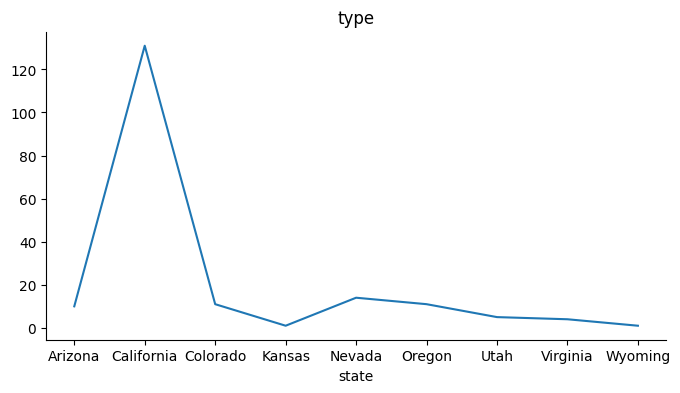

In [76]:
from matplotlib import pyplot as plt
Apartment_state['type'].plot(kind='line', figsize=(8, 4), title='type')
plt.gca().spines[['top', 'right']].set_visible(False)

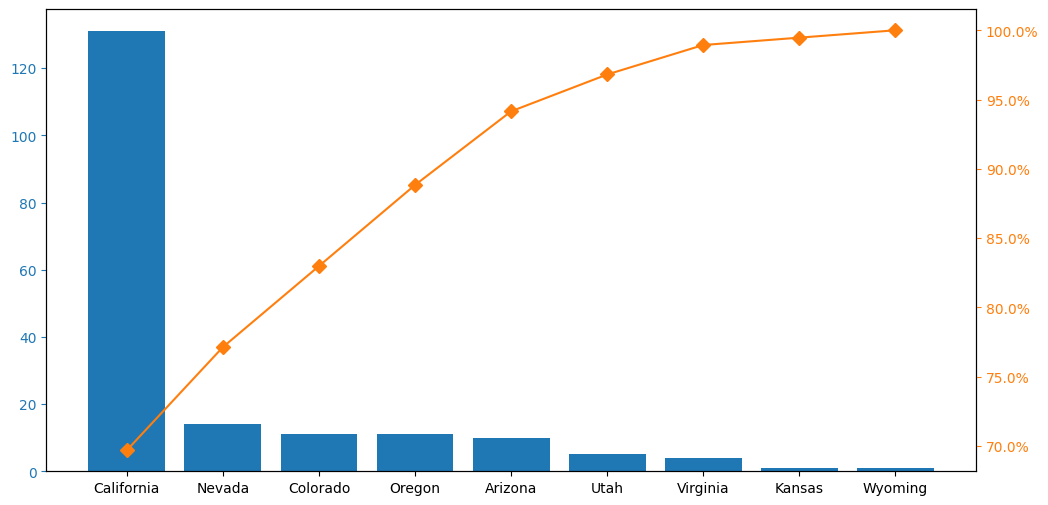

In [77]:
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
Apartment_state = Apartment_state.sort_values(by='type',ascending=False)
Apartment_state['cumpercentage'] = Apartment_state['type'].cumsum()/Apartment_state['type'].sum()*100


fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(Apartment_state.index, Apartment_state['type'], color="C0")
ax2 = ax.twinx()
ax2.plot(Apartment_state.index, Apartment_state["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.xticks(rotation=90)
plt.show()

What is the age distribution for customers? (Use the same age intervals or number of bins from the data analysis stage.)


<Axes: >

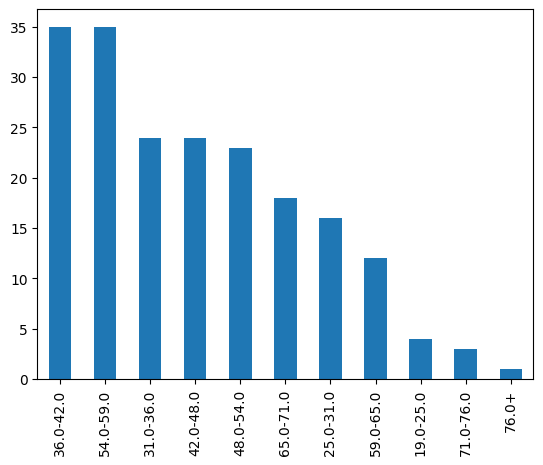

In [78]:
merged_df['age_category'].value_counts().plot(kind='bar')

What are the yearly sales for each building?


In [79]:
merged_df['year']=merged_df['date_sale'].dt.year

In [80]:
yearly_sales=merged_df.groupby(['year','building']).agg({'price': 'sum'}).unstack()

In [81]:
yearly_sales

price                                                 
building           1           2            3           4           5
year                                                                 
2004.0    4227851.51   169158.29          NaN         NaN         NaN
2005.0    6324598.20   890634.21          NaN         NaN         NaN
2006.0    1659489.53  6618314.39   1920832.69   457771.98   249591.99
2007.0     448134.27  7386069.24  11381105.84  5472320.12  2764168.87
2008.0           NaN         NaN    437840.60   388515.14  1385804.31
2010.0           NaN         NaN          NaN         NaN   357538.20

<Axes: xlabel='year'>

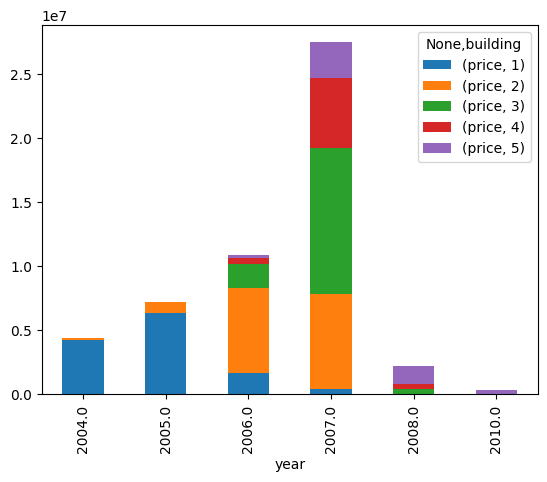

In [82]:
yearly_sales.plot(kind='bar', stacked=True)

 ### **Data Interpretation**

The last step of the project is to think about the data interpretation.

Based on the data analysis, what can you conclude about the customer profile, as well as the building characteristics?

You need to ask questions such as:

    Which customer age bracket has the most buyers potential?
    What is the most sought after building?
    What is the highest priced building?

Once you’ve formulated these questions and other relevant questions, consider how to leverage into a real-estate development strategy.


Which customer age bracket has the most buyers potential?
customer age bracket has the most buyers potential is between 36 to 42 years.

What is the most sought after building?
the most sought after building is type 2 and 3.

What is the highest priced building?
Building type  4.


In [83]:
merged_df.groupby('building').agg({'price': 'sum'}).sort_values(by='price')

,price
building,
4,12480299.17
5,14276995.44
1,14307448.61
2,16339725.35
3,17668429.10
